In [1]:
from CpSplineTransformer import CpSplineTransformer
from cuml.linear_model import LinearRegression
from cuml import train_test_split

import matplotlib.pyplot as plt
import cupy as cp
import cudf

In [2]:
def f(X):
    return cp.sin(2 * cp.pi * X)

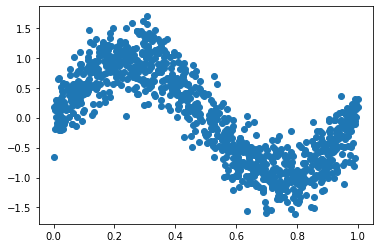

In [3]:
n_X = 1000
X = cp.random.uniform(size=(n_X, 1))
e = cp.random.normal(0, 0.3, size=(n_X, 1))
y = f(X) + e

plt.scatter(X.get(), y.get())

In [4]:
mySpline = CpSplineTransformer(degree=3, n_knots=10, extrapolation="constant")
reg = LinearRegression().fit(mySpline.fit_transform(X), y)

In [5]:
x_eval = cp.linspace(cp.min(X), cp.max(X), 200)
y_eval = reg.predict(mySpline.transform(x_eval[:, cp.newaxis]))

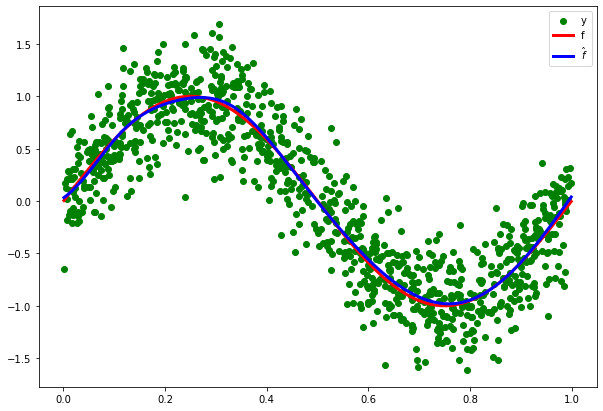

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(X.get(), y.get(), label='y', color='g')
plt.plot(x_eval.get(), f(x_eval).get(), label='f', color='r', linewidth=3)
plt.plot(x_eval.get(), y_eval.get(), label=r'$\hat{f}$', color='b', linewidth=3)
plt.legend()